In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Question 1
(a) Draw 1000 samples from a normal distribution $\mathcal{N}(0, 1)$. Denote these samples $ X $.

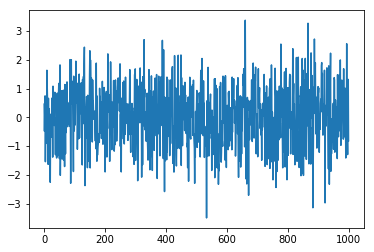

In [3]:
X = np.random.normal(0, 1,1000)
plt.plot(np.arange(0,1000),X)
plt.show()

(b) You suspect a third party replaced some of your samples with samples drawn from a different normal distribution **with $\mu>0$**. Could you use statistical hypothesis testing to check? What would be the null hypothesis?

_hint:_ there are multiple (literally infinite) possible null hypotheses. which would you choose if you would want to avoid "crying wolf" i.e. a false positive?

We would phrase a null hypothesis $H_0$ as follows: 'our sample hasn't been hacked and the Normal law is still centered ($\mu=0$)'.

We want to avoid False positives as much as can be, therefore we would chose a low $\alpha$, with the conservative Bonferroni correction. This correction lowers the $P_{val}$ as follows: $P_{val} < \dfrac{\alpha}{m}$.

If one element with such probability is found, then we will reject $H_0$

(c) Perform hypothesis testing for $ \alpha=0.01, 0.05, 0.1, 0.2, 0.3 $. What is the proportion of rejected null hypothesis for each? Plot your results

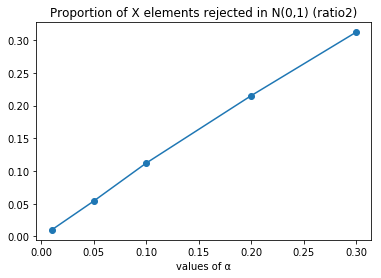

In [4]:
def rejection_proportion(sample, alpha_list, loc, scale, bonferroni=0):
    rejected_proportions = []
    for idx, alpha in enumerate(alpha_list):
        # divide by m if Bonferroni is activated
        if bonferroni>0:
            rejected_list = sample > norm.ppf(1-alpha/bonferroni, loc=0, scale=1)
        else:
            rejected_list = sample > norm.ppf(1-alpha, loc=0, scale=1)
            
        rejected_proportions.append(np.sum(rejected_list)/len(sample))
        
    return rejected_proportions

alpha_list = [0.01, 0.05, 0.1, 0.2, 0.3]
ratio2 = rejection_proportion(X, alpha_list, 0, 1)
plt.plot(alpha_list,ratio2, marker='o')
plt.title('Proportion of X elements rejected in N(0,1) (ratio2)')
plt.xlabel('values of α')
plt.show()

(d) For $\mu=1$ draw 1000 samples from a normal distribution $ \mathcal{N}(\mu, 1) $. Denote these samples $ Y $. 

In [5]:
Y = np.random.normal(1, 1,1000)

(e) For the $ \alpha $ values in (c) peform the **same** testing on $ Y $ (same null hypothesis). Plot the ratio$^1$ of null hypotheses rejected in $ Y $ (as the y axis) to the number of elements in $ Y $ against the ratio$^2$ of null hypotheses rejected in $ X $ to the number of elements in $ X $ (as the x axis).

- what is ratio$^1$?
- what is ratio$^2$?

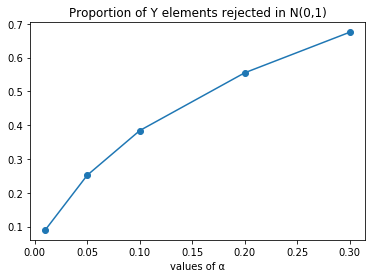

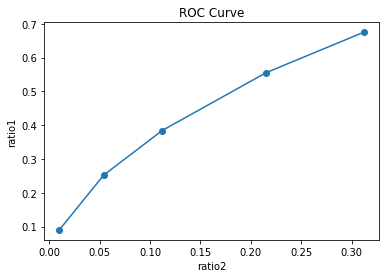

In [6]:
# Proportion of elements in Y that are rejected according to 
# the provided alphas, and a centered Normal law
ratio1 = rejection_proportion(Y, alpha_list,0,1)
plt.plot(alpha_list,ratio1, marker='o')
plt.title('Proportion of Y elements rejected in N(0,1)')
plt.xlabel('values of α')
plt.show()


plt.plot(ratio2, ratio1, marker='o')
plt.title('ROC Curve')
plt.xlabel('ratio2')
plt.ylabel('ratio1')
plt.show()

Ratio1 is the proportion of elements in $\mathcal{N}(1, 1)$ that are flagged as True positives in $\mathcal{N}(0, 1)$, in other words the True Positive Rate (TPR), or recall.

Ratio 2 is the proportion of elements in $\mathcal{N}(0, 1)$ that are flagged as Positive, over an entirely Negative population. In other words, the fallout, or False Positive Rate (FPR).

A plot of false positive rate Vs. true positive rate (in binary classification) is known as a ROC curve. 
A ROC curve shows the balance between the two rates for a given model, enabling an informed choice. 

(f) Repeat question (d) and (e) for $ \mu=0.1, 0.3, 0.5, 1.5 $. Plot ROC curves for all options. 


Explain the difference in the curves: 
- Is the problem harder for some $ \mu $ values? 
- How is that visible from the curves?
- For a single curve, how would you choose an optimal $ \alpha $ value?

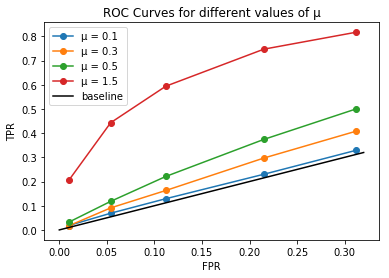

In [7]:
mu_list = [0.1, 0.3, 0.5, 1.5]
for mu in mu_list:
    Y = np.random.normal(mu, 1,1000)
    TPR = rejection_proportion(Y, alpha_list,0,1)
    FPR = rejection_proportion(X, alpha_list,0,1)

    plt.plot(FPR,TPR, label='μ = %.1f' % mu, marker='o')
    plt.legend()

plt.title('ROC Curves for different values of μ')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,0.32],[0,0.32], label='baseline', c='black')
plt.legend()
plt.show()

It is apparent from this chart, and also from logical thinking, that the further away the mean of the distribution, the more likely it is to have an interesting ROC. And conversely, for smaller values of $mu$ the rate of TPR/FPR is closer to 1 for 1.

Finding the optimal value of alpha really depends on the problem we're facing. Whether we want to maximize the number of true positives or minimize the number of false positives will determine which value we will select.

# Question 2
$$
\begin{aligned}
&X=\left\{X_i\right\}_{i=1}^{1000},\:\: X_i \sim \mathcal{N}(0, 1)\\
&Y=\left\{Y_i\right\}_{i=1}^{1000},\:\: Y_i \sim \mathcal{N}(1, 1)\\
&\alpha = 0.01, 0.05, 0.1, 0.2, 0.3
\end{aligned}
$$

(a) Again you suspect You suspect a third party replaced some of your samples with samples drawn from a different normal distribution with  μ>0. Perform hypothesis testing on $ X $ using $ \alpha = 0.05 $. Repeat this process 2000 times. What is the ratio of times in which at least one sample in $ X $ is falsely rejected?

In [8]:
falsely_rejected = []
for t in range(0,2000):
    X = np.random.normal(0, 1,1000)
    reject = np.array(rejection_proportion(X, [0.05],0,1))
    falsely_rejected.append(reject[0]>0)
    
print('At least one sample was falsely rejected %.2f%% of the time.' % (np.array(falsely_rejected).sum()/2000 * 100))

At least one sample was falsely rejected 100.00% of the time.


(b) Perform hypothesis testing on $ X $ using $ \alpha = 0.05 $ and apply the Bonferroni correction. Repeat this process 2000 times. What is the ratio of times in which at least one sample in $ X $ is falsely rejected?

In [9]:
falsely_rejected = []
for t in range(0,2000):
    X = np.random.normal(0, 1,1000)
    reject = np.array(rejection_proportion(X, [0.05],0,1,bonferroni=1000))
    falsely_rejected.append(reject[0]>0)
    
print('Using the Bonferroni correction, at least one sample was falsely rejected %.2f%% of the time.' % (np.array(falsely_rejected).sum()/2000 * 100))


Using the Bonferroni correction, at least one sample was falsely rejected 4.70% of the time.


(c) For all $ \alpha $ values peform testing on $ X $ and $ Y $, with and without using the Bonferroni correction. Repeat the process 2000 times and average results. Plot the ROC curves on the separate plots. 

hint: what is $ m $, the number of experiments?

<b>In this question, the number of experiments we will use to compute the Bonferroni will be the total number of samples across X and Y, i.e. m=2000.</b>

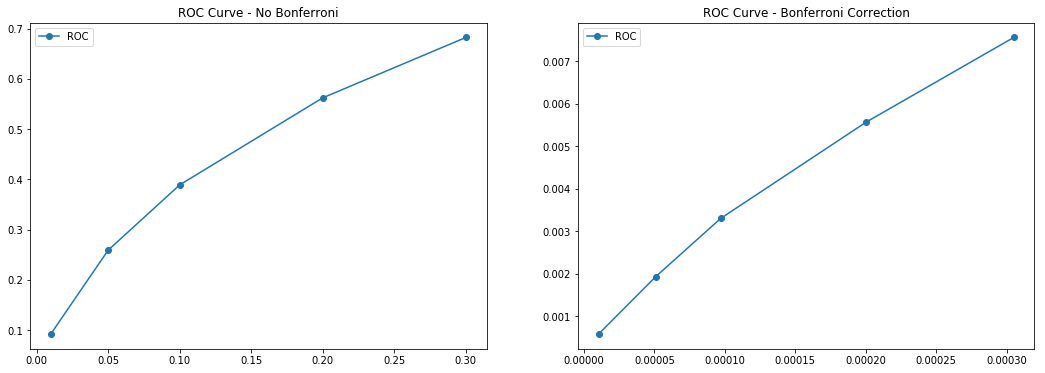

In [12]:
X_average = np.zeros(len(alpha_list))
Y_average = np.zeros(len(alpha_list))
X_average_bonf = np.zeros(len(alpha_list))
Y_average_bonf = np.zeros(len(alpha_list))

for t in range(0,2000):
    X = np.random.normal(0, 1,1000)
    Y = np.random.normal(1, 1,1000)
    
    X_reject = np.array(rejection_proportion(X, alpha_list,0,1))
    Y_reject = np.array(rejection_proportion(Y, alpha_list,0,1))
    X_reject_bonf = np.array(rejection_proportion(X, alpha_list,0,1,bonferroni=1000))
    Y_reject_bonf = np.array(rejection_proportion(Y, alpha_list,0,1,bonferroni=1000))
    
    X_average = np.add(X_reject, X_average)
    Y_average = np.add(Y_reject, Y_average)    
    X_average_bonf = np.add(X_reject_bonf, X_average_bonf)
    Y_average_bonf = np.add(Y_reject_bonf, Y_average_bonf)

X_average /= 2000
Y_average /= 2000
X_average_bonf /= 2000
Y_average_bonf /= 2000

plt.subplots(1,2, figsize=(18, 6))
plt.subplot(1, 2, 1)

plt.plot(X_average, Y_average, label='ROC', marker='o')
#plt.plot([0,0.32],[0,0.32], label='baseline', c='black')
plt.legend()
plt.title('ROC Curve - No Bonferroni')

plt.subplot(1, 2, 2)
plt.plot(X_average_bonf, Y_average_bonf, label='ROC', marker='o')
#plt.plot([0,0.01],[0,0.01], label='baseline', c='black')
plt.legend()
plt.title('ROC Curve - Bonferroni Correction')

plt.show()

# Question 3

$$
\begin{aligned}
&X=\left\{X_i\right\}_{i=1}^{1000},\:\: X_i \sim \mathcal{N}(0, 1)\\
&Y=\left\{Y_i\right\}_{i=1}^{1000},\:\: Y_i \sim \mathcal{N}(1, 1)\\
\end{aligned}
$$

(a) Use the given implementation of the Benjamini-Hochberg (BH) procedure. For $ \alpha = 0.05 $ compute the FDR with and without the BH procedure. Repeat 2000 times. What is the FDR with and without correction? What is the average number of true detections?

Bonus: what are these values for the Bonferroni correction?

In [16]:
def BH_procedure(X, Y, alpha=0.05):
    '''
    receive two row vectors X and Y and a significance level alpha. 
    null hypotheses is that all samples are drawn from N(0, 1).
    X is assumed to be sampled from H0 and Y sampled from H1 (mu>0)
    
    :param X: numpy row vector
    :param Y: numpy row vector
    
    :returns discovery_count: number of rejected null hypotheses
    :returns false_discovery_count: number of rejected null hypotheses
    ''' 
    
    pvals = 1 - norm.cdf(np.hstack((X, Y)))
    sort_inds = np.argsort(pvals)[::-1]
    
    m = X.size + Y.size
    
    for ind, sort_ind in enumerate(sort_inds):
        if pvals[sort_ind] <= float(m - ind)/(m) * alpha:
            break
            
    discovery_count = m - ind
    false_discovery_count = np.sum(sort_inds[ind:] < X.size - 1)
    
    return discovery_count, false_discovery_count

In [21]:
X = np.random.normal(0, 1,1000)
Y = np.random.normal(1, 1,1000)

false_discovery_count = np.array(rejection_proportion(X, [0.05],0,1))[0]*1000
true_discovery_count = np.array(rejection_proportion(Y, [0.05],0,1))[0]*1000
bh_discovery_count, bh_false_discovery_count = BH_procedure(X, Y, alpha=0.05)
bonf_false_discovery_count = np.array(rejection_proportion(X, [0.05],0,1,1000))[0]*1000
bonf_true_discovery_count = np.array(rejection_proportion(Y, [0.05],0,1,1000))[0]*1000

classic_FDR = false_discovery_count/(false_discovery_count+true_discovery_count)
BH_FDR = bh_false_discovery_count/bh_discovery_count
if bonf_false_discovery_count+bonf_true_discovery_count > 0:
    bonf_FDR = bonf_false_discovery_count/(bonf_false_discovery_count+bonf_true_discovery_count)

print('False Discovery rate (no correction) = %.2f%%' % (100*classic_FDR))
print('False Discovery rate (BH correction) = %.2f%%' % (100*BH_FDR))
if bonf_false_discovery_count+bonf_true_discovery_count > 0:
    print('False Discovery rate (Bonferroni corr.) = %.2f%%' % (100*bonf_FDR))
else:
    print('False Discovery rate (Bonferroni corr.) = N/A (no Discovery)' % (100*bonf_FDR))


False Discovery rate (no correction) = 16.23%
False Discovery rate (BH correction) = 0.00%
False Discovery rate (Bonferroni corr.) = 0.00%


In [22]:
classic_FDR_avg = 0
BH_FDR_avg = 0
bonf_FDR_avg = 0
# Bonferroni sometimes returns no discovery at all, so we will only
# average the rate when a discovery is made
bonf_FDR_count = 0
BH_true_discovery_avg = 0

for t in range(0,2000):
    X = np.random.normal(0, 1,1000)
    Y = np.random.normal(1, 1,1000)

    false_discovery_count = np.array(rejection_proportion(X, [0.05],0,1))[0]*1000
    true_discovery_count = np.array(rejection_proportion(Y, [0.05],0,1))[0]*1000
    bh_discovery_count, bh_false_discovery_count = BH_procedure(X, Y, alpha=0.05)
    bonf_false_discovery_count = np.array(rejection_proportion(X, [0.05],0,1,1000))[0]*1000
    bonf_true_discovery_count = np.array(rejection_proportion(Y, [0.05],0,1,1000))[0]*1000

    classic_FDR = false_discovery_count/(false_discovery_count+true_discovery_count)
    BH_FDR = bh_false_discovery_count/bh_discovery_count
    
    if bonf_false_discovery_count+bonf_true_discovery_count > 0:
        bonf_FDR_count += 1
        bonf_FDR = bonf_false_discovery_count/(bonf_false_discovery_count+bonf_true_discovery_count)
        bonf_FDR_avg+=bonf_FDR

    classic_FDR_avg+=classic_FDR
    BH_FDR_avg+=BH_FDR
    BH_true_discovery_avg+=bh_discovery_count-bh_false_discovery_count
    
classic_FDR_avg /= 2000
BH_FDR_avg /= 2000
bonf_FDR_avg /= bonf_FDR_count
BH_true_discovery_avg /= 2000

print('Average FDR (no correction) = %.2f%%' % (100*classic_FDR_avg))
print('Average FDR (BH correction) = %.2f%%' % (100*BH_FDR_avg))
print('Average FDR (Bonferroni corr.) = %.2f%%' % (100*bonf_FDR_avg))
print('Average true detections (BH correction) = %.2f' % BH_true_discovery_avg)


Average FDR (no correction) = 16.20%
Average FDR (BH correction) = 3.57%
Average FDR (Bonferroni corr.) = 2.77%
Average true detections (BH correction) = 5.01


(b) Repeat Question 2 (c) with the BH procedure correction instead of Bonferroni.

Bonus: compare against result for Bonferroni

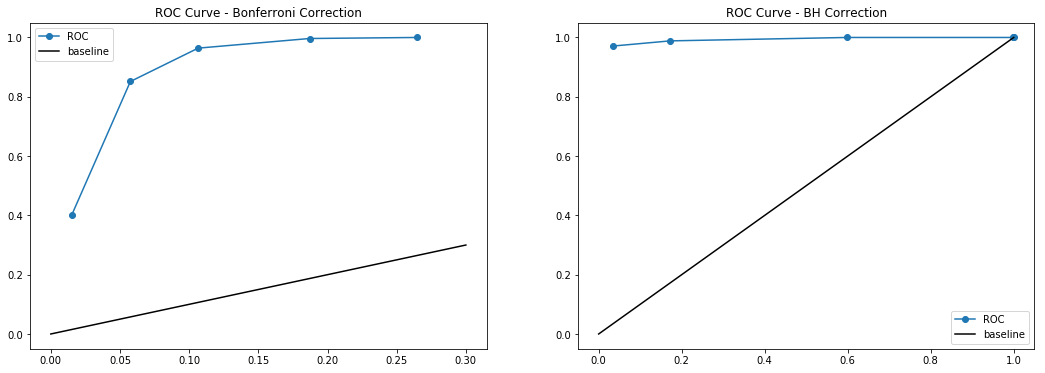

In [23]:
X_average_bonf = np.zeros(len(alpha_list))
Y_average_bonf = np.zeros(len(alpha_list))
X_average_BH = np.zeros(len(alpha_list))
Y_average_BH = np.zeros(len(alpha_list))

for t in range(0,2000):
    X = np.random.normal(0, 1,1000)
    Y = np.random.normal(1, 1,1000)
    
    X_reject_bonf = np.array(rejection_proportion(X, alpha_list,0,1,bonferroni=1000))
    Y_reject_bonf = np.array(rejection_proportion(Y, alpha_list,0,1,bonferroni=1000))
    
    X_reject_BH = []
    Y_reject_BH = []
    for alpha in alpha_list:
        bh_discovery_count, bh_false_discovery_count = BH_procedure(X, Y, alpha)
        X_reject_BH.append(bh_false_discovery_count/1000)
        Y_reject_BH.append((bh_discovery_count-bh_false_discovery_count)/1000)
    
    X_average_bonf = np.add(X_reject_bonf>0, X_average_bonf)
    Y_average_bonf = np.add(Y_reject_bonf>0, Y_average_bonf)
    X_average_BH = np.add(np.array(X_reject_BH)>0, X_average_BH)
    Y_average_BH = np.add(np.array(Y_reject_BH)>0, Y_average_BH)

X_average_bonf /= 2000
Y_average_bonf /= 2000
X_average_BH /= 2000
Y_average_BH /= 2000

plt.subplots(1,2, figsize=(18, 6))
plt.subplot(1, 2, 1)

plt.plot(X_average_bonf, Y_average_bonf, label='ROC', marker='o')
plt.plot([0,0.3],[0,0.3], label='baseline', c='black')
plt.legend()
plt.title('ROC Curve - Bonferroni Correction')

plt.subplot(1, 2, 2)
plt.plot(X_average_BH, Y_average_BH, label='ROC', marker='o')
plt.plot([0,1],[0,1], label='baseline', c='black')
plt.legend()
plt.title('ROC Curve - BH Correction')

plt.show()